許多機器學習問題涉及訓練實例的幾千甚至上百萬個特徵，這不僅導致訓練非常緩慢，也會更難找到好的解決方案。這個問題通常稱為*維度的詛咒（curse of dimensionality）*。

一般可以利用大量減少特徵的數量，來將棘手的問題轉化成容易解決的問題。

數據降維確實會丟失一些資訊，雖然能夠加速訓練，但也會輕微降低系統性能。也會讓流水線（pipelines）更為複雜，維護難度上升。所以當訓練太慢，首先應該嘗試的還是繼續使用原始數據，然後再考慮數據降維。在某些情況下，降低訓練數據的維度可能會濾除掉一些不必要的雜訊和細節，從而導致性能更好（但通常來說不會，只會加速訓練）。

除了加快訓練外，降維對於數據可視化（or DataViz）也非常有用。將維度降到兩個（或三個），就可以在圖形上繪製出高維訓練集，透過視覺來檢測模式，可以獲得一些重要的洞察，如聚類。

# The Curse of Dimensionality

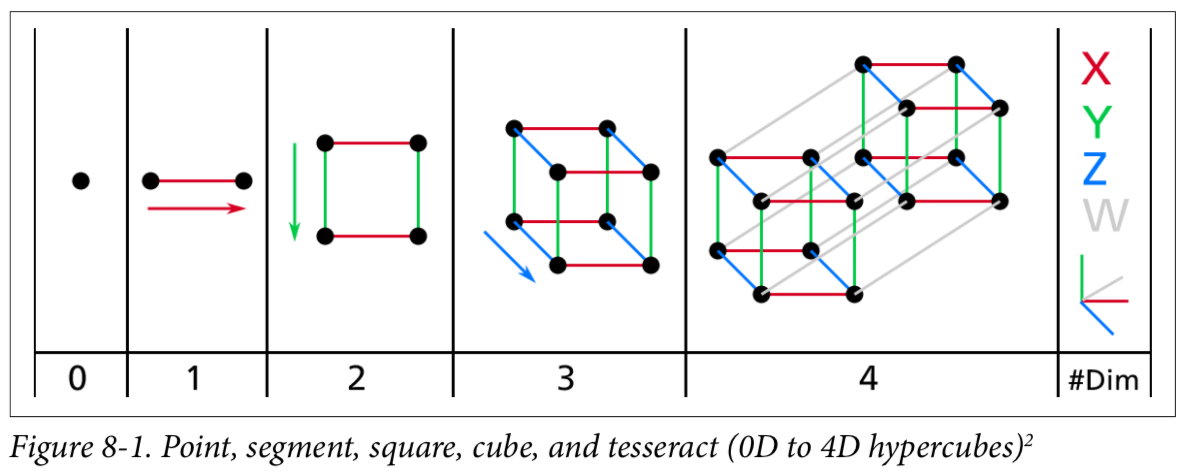

在高維空間中，很多行為都會迥然不同。例如，如果在一個單位平方（1×1 的正方形）內隨機選擇一個點，這個點黎邊界的距離小於 0.001 的機率只有 0.4％ （也就是說，一個隨機的點不太可能剛好位於某個維度的“極端”)。但在一個 10,000 維的單位超立方體（1×1×⋯×1 立方体，具有 1 萬個 1）中，這個機率大於99.999999％。 高維超立方體中的大多數點非常接近邊界。

還有一個更麻煩的區别：
- 如果在單位平方中隨機選取兩個點，這兩個點之間的平均距離大約為 0.52。
- 如果在三維的單位立方體中隨機挑兩個點，兩點之間的平均距離大約為 0.66。
- 但在 1,000,000 維的超立方體中隨機挑兩個點，平均距離大約是 408.25（約等於 $ \sqrt{1 000 000 / 6} $）！這是違反直覺的。這意味著高維數據集存在非常稀疏的風險：大多數訓練實例可能彼此相距很遠。這也意味著新實例可能遠離任何訓練實例，導致預測跟低維度相比更加不可靠，因為它們基於更大的推断。

訓練集的維度越多，過擬合的風險就越大。

理論上，透過增大訓練集，使訓練實例達到足夠的密度，是可以解開維度詛咒的。不幸的是，在實踐中，要達到給定密度所需的訓練實例數量隨著維度增加呈指數式上升。

# Main Approaches for Dimensionality Reduction

降維的兩種主要方法：投影（projection）和流形學習（Manifold Learning）。

# Projection

在大多數現實世界問題中，訓練實例在所有維度上*並不是*均匀分佈的。許多特徵幾乎是不變的，也有許多特徵是高度相關連的。因此，**高維度空間的所有訓練實例實際上（或近似於）受一個低得多的低維子空間所影響**。

在下圖中，可以看到一個由圓圈表示的 3D 數據集。

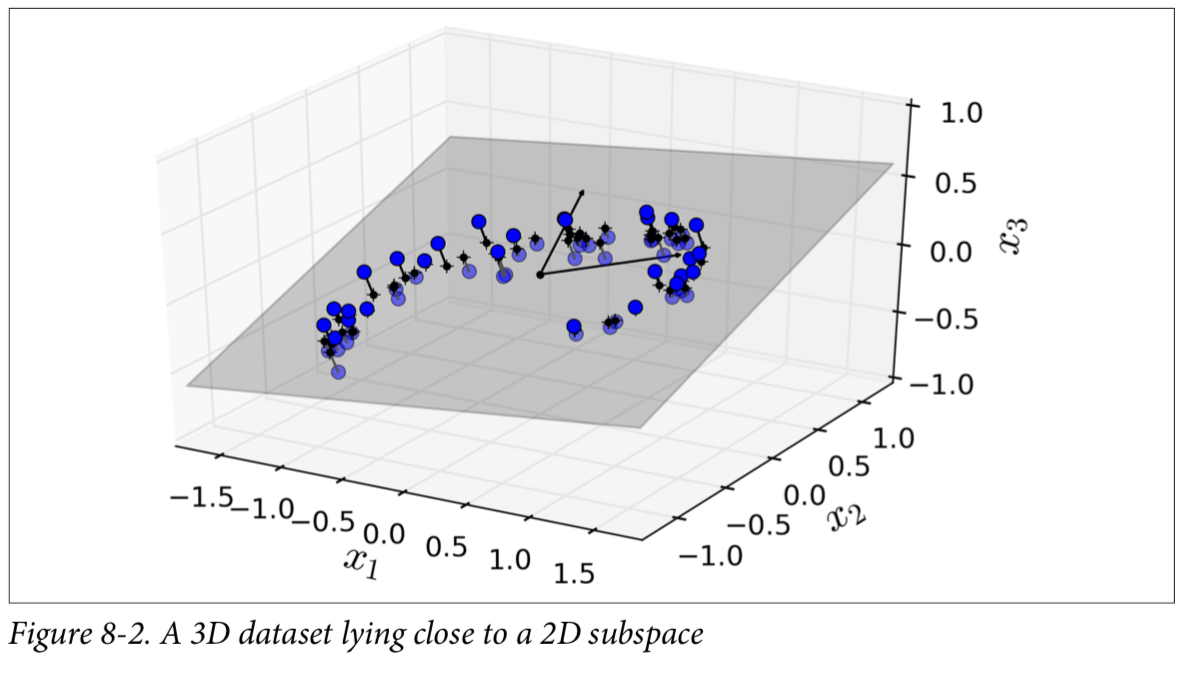

可以看到，所有訓練實例都靠近平面：這是高維（3D）空間的低維（2D）子空間。现在，如果將每個訓練實例**垂直投影**到該子空間上（如圖中實例到平面之間的短線所示），將得到了新的 2D 數據集，如下圖所示。這已經將數據集維度**從 3 維降到 2 維**。注意，圖中的軸對應的是新特徵 $z_1$ 和 $z_2$（平面上投影的坐標）。（3D 時的特徵是 $x_1, x_2, x_3$）

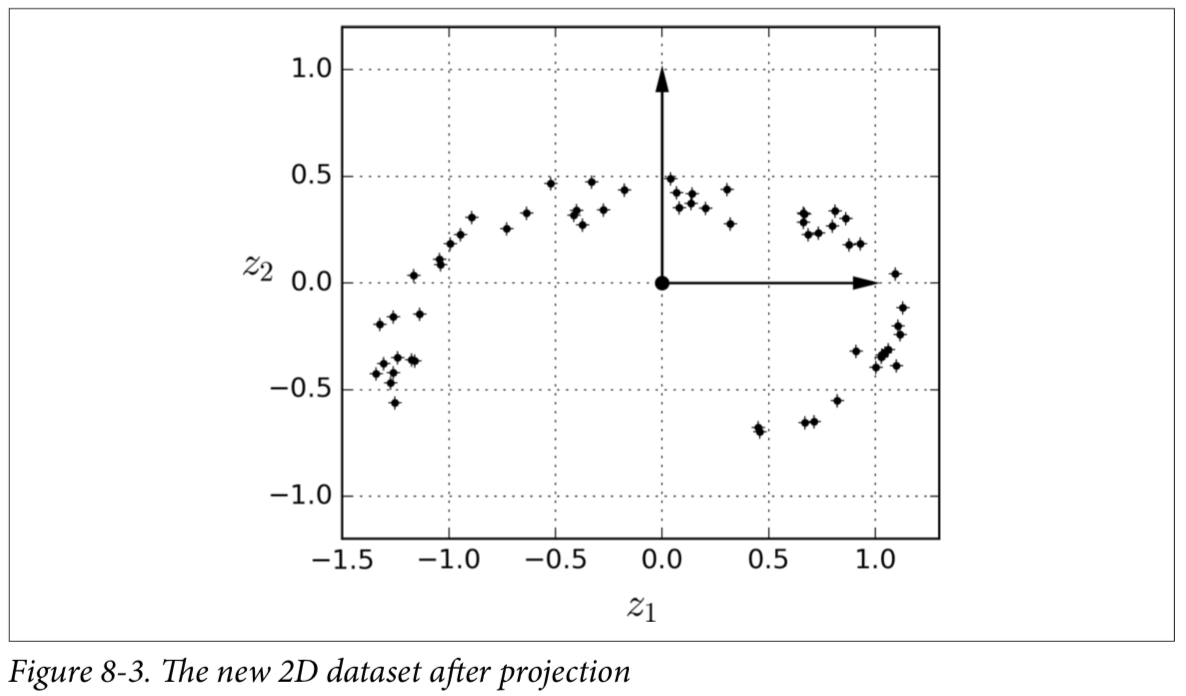

不過，投影並不總是降維的最佳方法。在許多情況下，子空間可能會**彎曲或轉動**，例如下圖中所示的著名的**瑞士卷玩具數據集（Swiss roll toy dataset）**。

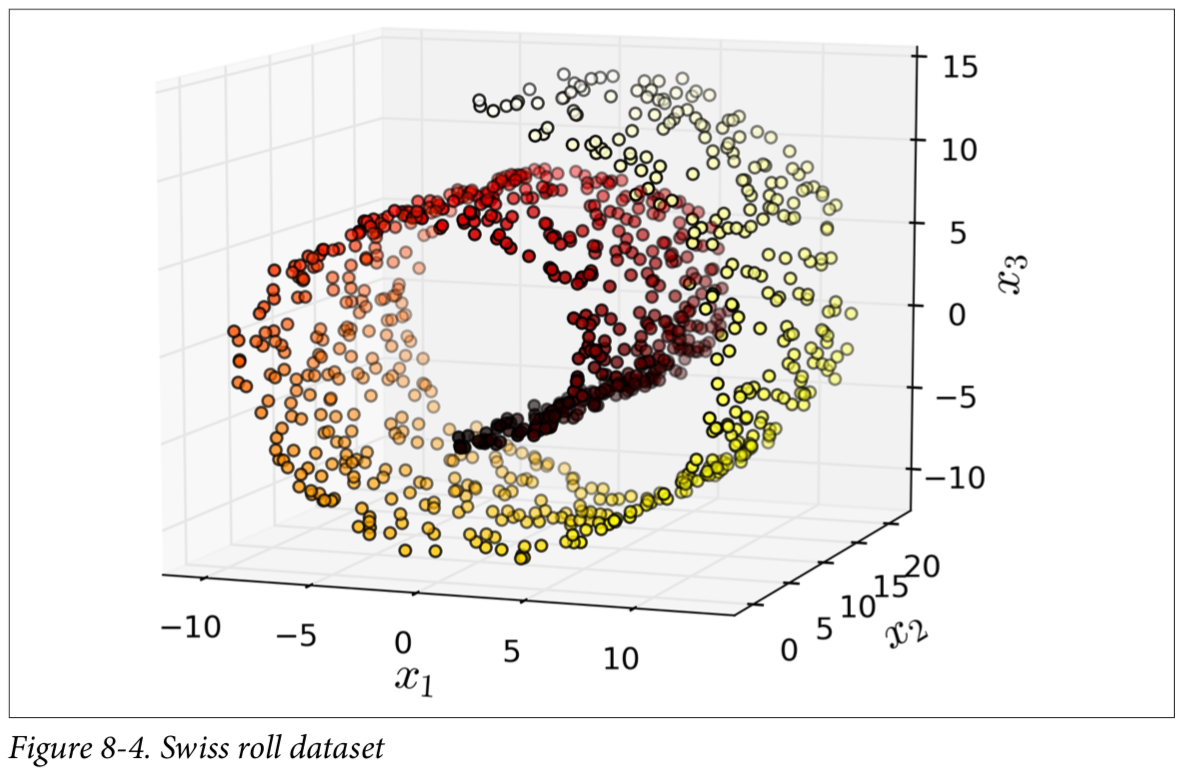

簡單地進行平面投影（例如放棄 $𝑥_3$ ）會直接將瑞士卷的不同層壓扁在一起，如下圖左側所示。但是，真正想要的是將整個瑞士卷展開鋪平後的 2D 數據集，如下圖的右圖所示。

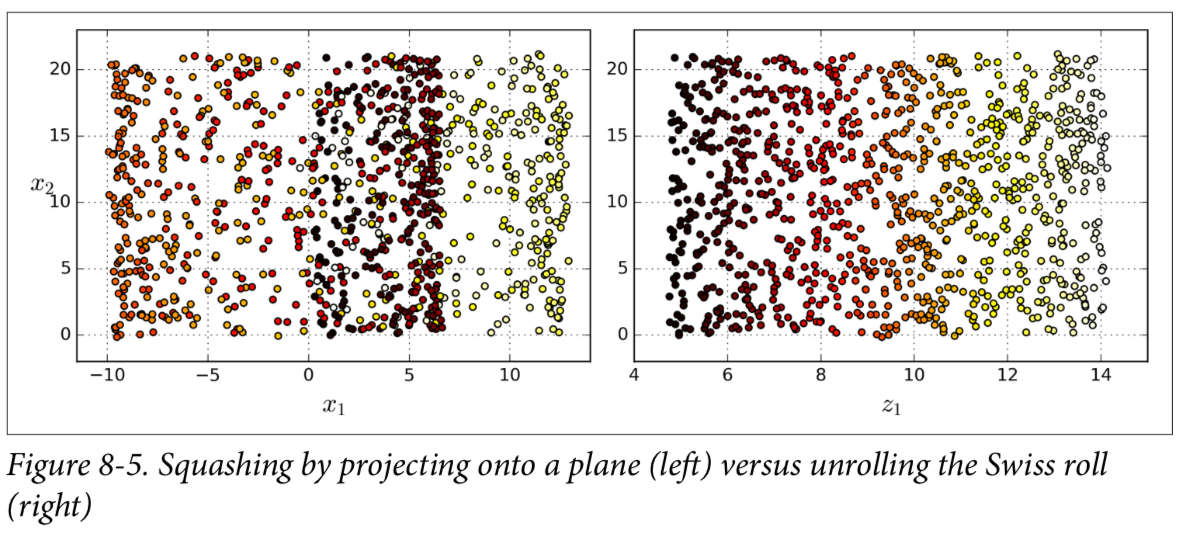

## Manifold Learning

瑞士卷是二維流形（2D manifold）的一個例子。2D 流形就是一個能夠在更高維空間裡面彎曲和扭轉的 2D 形狀。更一般地，$d$ 維流形是 $n$ 維空間的一部份（其中 $d<n$），局部類似於一個 d 維超平面。在瑞士卷的情況下，$d = 2$ 且 $n = 3$：它局部類似於一個 2D 平面，但是在第三個維度上卷起。

許多降維算法都透過對訓練實例所在的*流行（manifold ）*進行建模来工作；這被稱為*流形學習（Manifold Learning）*。它依賴於*流行假設（manifold assumption）*，也稱為*流形假說（manifold hypothesis）*，認為大多數現實世界的高維數據集存在一個低維度的流行來重新表示。這個假設通常是憑經驗觀察的。

流形假設（manifold assumption ）通常還伴隨著一個隱含的假設：如果能用低維空間的流形表示，手上的任務（例如，分類或迴歸）將變得更簡單。

例如，在下圖的上面一列，瑞士卷被分為兩類：在3D 空間中（左上），決策邊界將會相當複雜，但在展開的 2D 流形空間中（右上），決策邊界是一條簡單的直線。

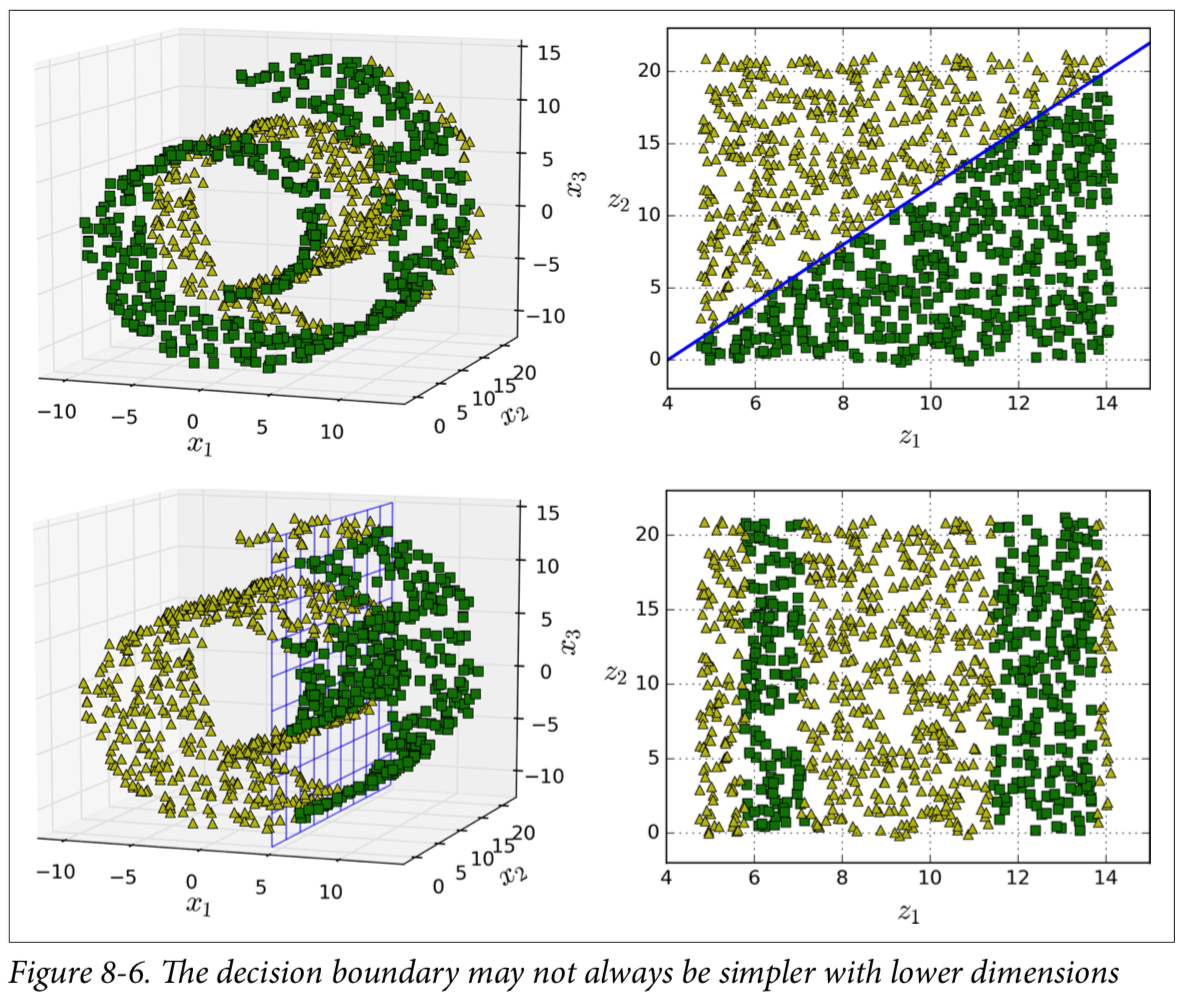

但上述的這個假設並不總是成立。例如，在上圖的底列中，決策邊界在 $𝑥_1=5$ 處，在原始的 3D 空間中，這個邊界看起來非常簡單（一個垂直平面），但在展開的流形中，決策邊界看起來反而更為複雜（四個獨立線段的集合）。

簡而言之，如果在訓練模型之前降低訓練集的維度，肯定會加快訓練速度，但這個並不總是會導致更好或更簡單的解決方案，這一切都取決於數據集。

# PCA

**主成份分析（PCA）**是目前最受歡迎的降維算法。它先是識別出最接近數據的超平面，然后將數據投影到其上。

## Preserving the Variance

在將訓練集投影到低維超平面之前，需要選擇正確的超平面。

例如，下圖左側代表表一個簡單的 2D 數據集，沿三個不同的軸（即一維超平面）。右圖是數據集映射到每條軸上的結果。如結果所見，
- 實線上的投影保留了最大差異性（方差），（上面）
- 點虛線上的投影只保留了非常小的差異性（方差），（下面）
- 點横虛線上的投影差異性（方差）居中。（中間）

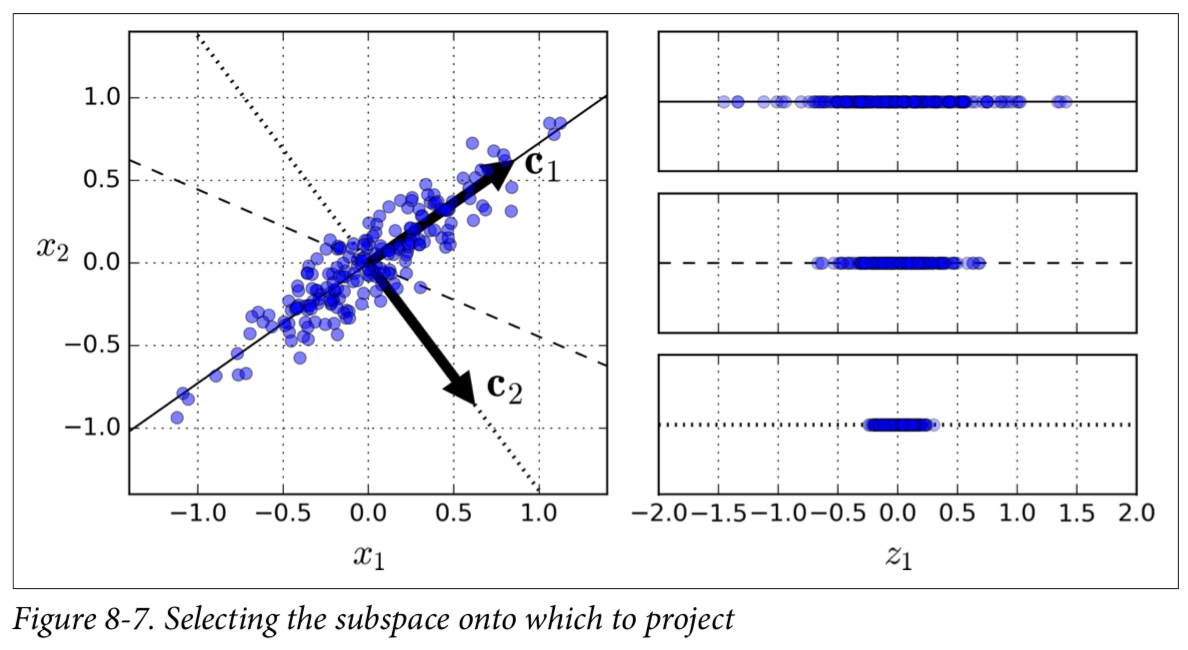

選擇保留最大差異性（方差）的軸似乎是合理的，因為它可能比其他兩種投影丟失的信息更少。要證明這一選擇，還可以選擇的方法是，比較原始數據集與其軸上的投影之間的均方距離，使這個均方距離最小的軸是最合理的選擇。這也就是 PCA 背後的簡單思想。

## Principal Components

PCA 可以在訓練集是別出哪條軸對差異性的貢獻度最高。在上圖中，即是由實線表示的軸。 同時它也找出了第條二軸，它對剩餘差異性的貢獻度最高，與第一條軸垂直（正交），考慮了剩餘方差的最大量。在這個 2D 示例中，除了這條點線在沒有其他。如果是在一個更高維的數據集中，PCA 還會找到與前兩條都正交的第三條軸，以及第四條，第五條等等 - 軸的數量與數據集維度數量相同。

定義第 $𝑖$ 條軸的單位向量叫做第 $i$ 個主成分（PC）($i^{th}$ principal component)。在上圖中，第一個主成分為 $c_1$，第二個主成分是 $c_2$。

在 Figure 8-2. 中，前兩個主成分是平面中正交的箭頭所示，第三個主成分則是垂直於平面（向上或向下）。

主成份的方向是不穩定的：如果稍微打亂訓練集，然後重新運行 PCA，部分新的主成份可能指向跟原來的主成份相反的方向。但是，它们通常仍然位於相同的軸上。在某些情況下，兩條主成份可能會旋轉甚至互換，但它们定義的平面通常保持不變。

要找到訓練集的主成份可以用一種標準矩陣分解技術，稱為奇異值分解（SVD）。可以將訓練及矩陣 X 分解成三個矩陣的點積 $𝑈·Σ·𝑉$，其中 $𝑉$ 正包含想要的所有主成份，如以下公式所示。

**Principal components matrix：**

$$ V = \left\lgroup\begin{matrix}| & \;\;\;\;\; |  \quad&&\;  | \cr c_1 & c_2 & ... & c_n \cr  | &\; | & \quad&\; | \end{matrix}\right\rgroup$$


以下使用 NumPy 的 svd() 取得訓練集的所有主成分，並提取前兩個。

**svd() 函数返回** $ U, s ,Vt $, 其中 $Vt$ 等于 $ V $, 是矩阵 $V$的转置. 

Build 3D dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

In [3]:
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles) / 2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

PCA using SVD decomposition

In [4]:
X_centered = X - X.mean(axis = 0)
U,s,Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:,0]
c2 = Vt.T[:,1]

In [5]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n,:n] = np.diag(s)

np.allclose(X_centered,U.dot(S).dot(Vt))

True

PCA 假定數據集以原點為中心。所以 Scikit-Learn 的 PCA 將會處理數據集中。 但是，如果要自行實踐 PCA（如前面的示例所示），或者如果使用其他套件時，不要忘記先將數據集中。

## Projecting Down to d Dimensions

一旦確定了所有主成分，就可以將數據集投影到由前 $d$ 個主成分定義的超平面上，從而將數據集的維度降低到 $d$ 維。這個超平面的選擇，能確保投影保留盡可能多的差異性。例如，在 Figure 8-2 中，3D 數據集投影到由前兩個主成分定義的 2D 平面上，就保留了原始數據集的大部分差異。因此，2D 投影看起來非常像原始 3D 數據集。

要將訓練集投影到超平面上，簡單地計算訓練集矩陣 $𝑋$ 和矩陣  $𝑊_𝑑$ 的點積即可，$𝑊_𝑑$ 是包含前 $d$ 個主成分的矩陣（即由 $𝑉^T$ 的前 $d$ 行组成的矩陣），如以下公式所示。

**Projecting the training set down to d dimensions：**

$$ X_{d-proj} = X \cdot W_d $$

以下程式碼將訓練及投影到由前兩個主成份定義的平面上：

In [6]:
W2 = Vt.T[:,:2]
X2D = X_centered.dot(W2)

In [7]:
X2D_using_svd = X2D

## Using Scikit-Learn

Scikit-Learn 的 PCA 使用 SVD 分解來實現主成分分析。以下應用 PCA 將數據集的維度降低到二維（它會自動處理數據集中）。

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [10]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [11]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

將 PCA 轉換器應用到數據集之後，可以透過變量 **components_** 來訪問主成分（它包含主成分是水平向量，因此例如，第一個主成分等於pca.components_.T[：,0]）。

在略有不同的數據集上多次運行 PCA 可能會導致不同的結果。 通常，唯一的區别是可能會翻轉某些軸。

在這例子中，使用 Scikit-Learn 的 PCA 提供與 SVD 方法相同的投影，除了兩個軸都被翻轉：

In [12]:
np.allclose(X2D, -X2D_using_svd)

True

恢復投影在平面上的 3D 點（PCA 2D子空間）。

In [13]:
X3D_inv = pca.inverse_transform(X2D)

當然，在投影步驟中有一些資訊遺失，所以恢復的 3D 點並不完全等於原始的 3D 點。

In [14]:
np.allclose(X3D_inv, X)

False

可以計算重建誤差

In [15]:
np.mean(np.sum(np.square(X3D_inv - X), axis = 1))

0.010170337792848549

SVD 方法中的逆變換如下所示

In [16]:
X3D_inv_using_svd = X2D_using_svd.dot(Vt[:2, :])

這兩種方法的重建並不完全相同，因為 Scikit-Learn 的 PCA 會自動處理反轉平均居中的問題，但如果減去均值，會得到相同的重建

In [17]:
np.allclose(X3D_inv_using_svd, X3D_inv - pca.mean_)

True

PCA 對象對其計算的主成分提供的訪問(access)

In [18]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

與使用 SVD 方法計算的前兩個主成分進行比較

In [19]:
Vt[:2]

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ]])

可注意軸是如何翻轉的。

## Explained Variance Ratio

另一個非常有用的資訊是每個主成分的方差解釋率，可透過 **explain_variance_ratio_** 獲得。它表示每個主成分的軸對數據集方差的貢獻度。例如，看一下 Figure 8-2. 中表示的 3D 數據集的前兩個主成分的方差解釋率：

In [20]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

這說明數據集方差的 84.2% 由第一個軸所貢獻，14.6％ 來自於第二個軸。剩下給第三個軸的不到 1.2％，因此可以認為它可能沒有什麼資訊。

透過向下投影到 2D，失去了大約 4.9％ 的方差

In [21]:
1 - pca.explained_variance_ratio_.sum()

0.011195535570688975

以下是如何使用 SVD 方法計算解釋的方差比（回想一下 s 是矩陣 S 的對角線）

In [22]:
np.square(s) / np.square(s).sum()

array([0.84248607, 0.14631839, 0.01119554])

## Choosing the Right Number of Dimensions

除了果斷地選擇要降至的維度數量，通常更好的辦法是將靠前的主成分方差解釋率依次相加，直到得到足夠大比例的方差（例如 95%），這時的維度數量就是很好的選擇。

如果是為了數據可視化而降維，通常會直接降到二維或三維。

以下是計算 PCA 但沒有降維，而是計算若要保留訓練集方差的 95% 所需要的最低維度數量：

In [23]:
pca = PCA()

In [24]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [26]:
d = np.argmax(cumsum >= 0.95) + 1
d

2

之後，就可以設置 n_components = d 再次運行 PCA。

還有一個更好的方法，不需要指定保留主成分的數量，可以直接將 n_conponents 設置為 0.0 到 1.0 之間的浮點數，表示希望保留的方差比。

In [27]:
pca = PCA(n_components = 0.95)

In [28]:
X_reduced = pca.fit_transform(X)

還可以將解釋方差會製成關於維度數量的函數（繪製 cumsum 即可，如下圖）。

圖形中的曲線通常有一個拐點，說明方差停止快速增長。可以將其視為數據集的固有維數（intrinsic dimensionality）。

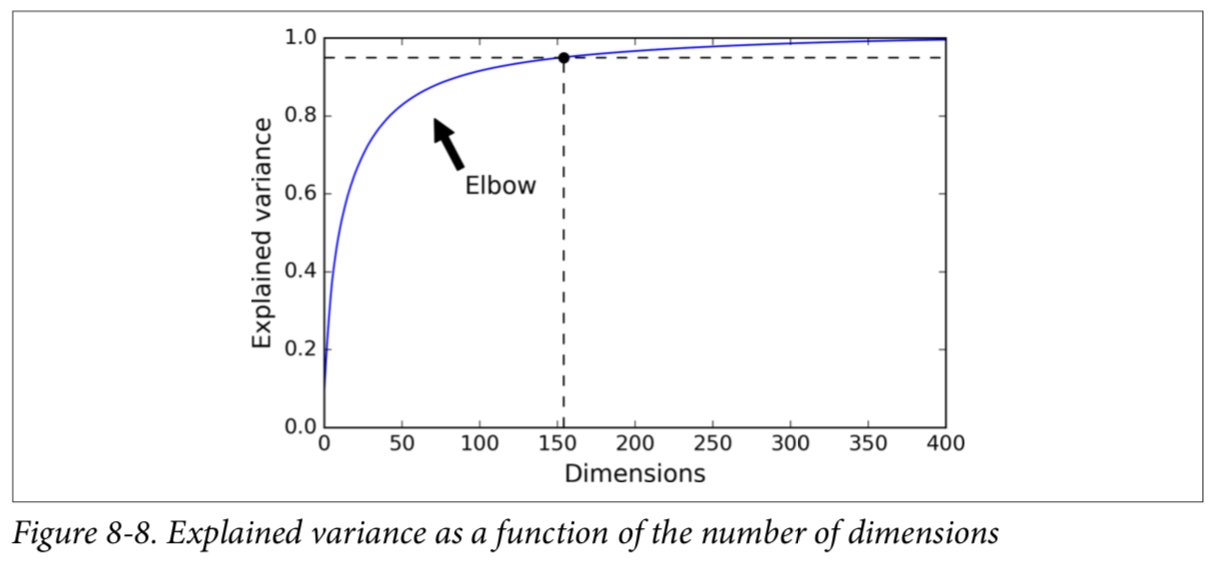

上圖中可以看出，將維度數量降低至 100 維，不會損失太多的解釋方差。

## PCA for Compression

降維之後訓練集占用的空間更小得多。例如，將 MNIST 數據集應用主成分分析，並保留其 95％ 的方差。會發現原來每個實例的 784 個特徵變得只有 150多個特徵。這保留了絕大部分方差的同時，數據集的大小變為不到原始的 20％！这是一個合理的壓縮比，可以看到它如何極大地加速分類算法（如 SVM 分類器）。

在 PCA 投影上運行投影的逆轉換，也可以將縮小的的數據集解壓縮回 784 維數據集。当不會得到原始數據，因为投影時損失了一些資訊（5％ 被丟棄的方差），但它還是可能非常接近原始數據。原始數據和重建數據（壓縮之後解壓縮）之間的均方距離，被稱為**重建誤差（reconstruction error）**。

例如，以下是將 MNIST 數據集壓縮到 154 維，然后使用 inverse_transform() 將其解壓縮回 784 維。圖中顯示了原始訓練集（左側）的部分數字，以及經過壓縮和解壓縮後的圖像。可以看到圖像質量略有下降，但數字基本完好無損。

MNIST compression

In [29]:
from six.moves import urllib
from sklearn.datasets import fetch_mldata

In [30]:
#mnist = fetch_mldata('MNIST original')      # 書中使用的但無法下載
mnist = fetch_mldata('MNIST original', transpose_data = True, data_home = 'datasets')

/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = mnist['data']
y = mnist['target']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [34]:
pca = PCA()

In [35]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [36]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [37]:
d = np.argmax(cumsum >= 0.95) + 1
print(d)

154


In [38]:
pca = PCA(n_components = 0.95)

In [39]:
X_reduced = pca.fit_transform(X_train)

In [40]:
pca.n_components_

154

In [41]:
np.sum(pca.explained_variance_ratio_)

0.9504463030200188

In [42]:
pca = PCA(n_components = 154)

In [43]:
X_reduced = pca.fit_transform(X_train)

In [44]:
X_recovered = pca.inverse_transform(X_reduced)

In [45]:
def plot_digits(instances, images_per_row = 5, ** options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis = 1))
    
    image = np.concatenate(row_images, axis = 0)
    plt.imshow(image, cmap = matplotlib.cm.binary, ** options)
    plt.axis('off')

Text(0.5,1,'Compressed')

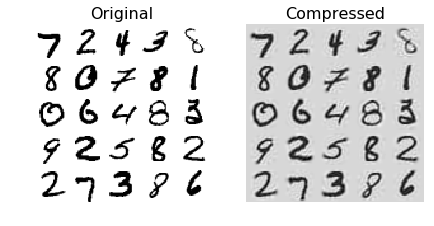

In [46]:
plt.figure(figsize = (7, 4))

plt.subplot(121)
plot_digits(X_train[::2100])
plt.title('Original', fontsize = 16)

plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title('Compressed', fontsize = 16)

In [47]:
X_reduced_pca = X_reduced

逆轉換的方程式如以下公式所示

**PCA inverse transformation, back to the original number of dimensions：**

$$ X_{recovered} = X_{d‐proj} \cdot W_d^T $$

## Incremental PCA

先前各種 PCA 的種種實現，都需要整個訓練集進入記憶體，才能運行 SVD 算法。幸好，有 **增量主成分分析（Incremental PCA (IPCA)） 算法**：可以将訓練集分成一個個小批量，一次給 IPCA 算法餵一個小批量。這對大型訓練集非常有用，並且也可以在線應用PCA（也就是新實例產生時，算法開始運行行）。

以下將 MNIST 數據集拆分為 100 個小批量（使用 NumPy 的 array_split() ）並將它們提供给 Scikit-Learn 的 IncrementalPCA，將數據集降低到 154 維。這時，必須為每個小批量調用 partial_fit() 而不是之前整個訓練集的 fit()。

In [48]:
from sklearn.decomposition import IncrementalPCA

In [49]:
n_batches = 100
inc_pca = IncrementalPCA(n_components = 154)

In [50]:
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

In [51]:
X_reduced = inc_pca.transform(X_train)

In [52]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

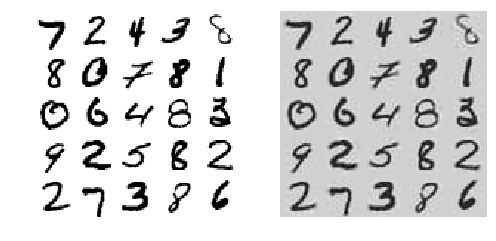

In [53]:
plt.figure(figsize = (7, 4))

plt.subplot(121)
plot_digits(X_train[::2100])

plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])

plt.tight_layout()

In [54]:
X_reduced_inc_pca = X_reduced

比較使用 regular PCA 和 incremental PCA 轉換 MNIST 的結果。

首先，均值是相等的：

In [55]:
np.allclose(pca.mean_, inc_pca.mean_)

True

但結果並不完全相同。

增量 PCA 提供了一个非常好的近似解決方案，但它並不完美。

In [56]:
np.allclose(X_reduced_pca, X_reduced_inc_pca)

False

或者，可以使用 NumPy 的 memmap，它允許操作一個儲存在磁碟上的二進制文件中的大型數組，就好像它也完全在記憶體中一樣，而這個 memmap 僅在需要時加載記憶體中需要的數據。由于 IncrementalPCA 在任何時間只使用數組的一小部份，因此記憶體使用仍然受到控制。這時使用常用的 fit()，如下面所示：

創建memmap() 結構並將 MNIST 數據複製到其中。

這通常由第一個程序完成：

In [57]:
filename = 'my_mnist.data'
m, n = X_train.shape

In [58]:
X_mm = np.memmap(filename, dtype = 'float32', mode = 'write', shape = (m, n))
X_mm[:] = X_train

現在刪除 memmap() 將觸發其 Python 終結器，確保將數據保存到磁碟。

In [59]:
del X_mm

接下来，另一個程序將加載數據並將其用於訓練：

In [60]:
X_mm = np.memmap(filename, dtype = 'float32', mode = 'readonly', shape = (m, n))

In [61]:
batch_size = m // n_batches

In [62]:
inc_pca = IncrementalPCA(n_components = 154, batch_size = batch_size)

In [63]:
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=525, copy=True, n_components=154, whiten=False)

## Randomized PCA

Scikit-Learn 提供了另一種執行 PCA 的選項，稱為**隨機 PCA(Randomized PCA)** 。這是一種隨機算法，可快速找到前 $d$ 個主成分的近似值。其計算複雜度維 $O(m×d^2)+ O(d^3)$，而不是 $O(m×n^2)+O(n^3)$，所以當 d 遠小於 n 時，它比先前的算法要快得多。

In [64]:
rnd_pca = PCA(n_components = 154, svd_solver = 'randomized', random_state = 42)

In [65]:
X_reduced = rnd_pca.fit_transform(X_train)

# Kernel PCA

核技巧，一種數學技術，隱性地將實例映射到非常高維的空間（稱為特徵空間），透過支持向量機可以實現非線性分類和迴歸。

同樣的技巧也可以應用於 PCA，使複雜的非線性投影降維成為可能，這就是*核主成分分析（Kernel PCA (kPCA)）*。擅長在投影後保留實例的集群，有時甚至也能展開近似於一個扭曲流形的數據集。

以下使用 Scikit-Learn 的 KernelPCA 來執行帶有 RBF 内核的 kPCA。

In [66]:
from sklearn.datasets import make_swiss_roll

In [67]:
X, t = make_swiss_roll(n_samples = 1000, noise = 0.2, random_state = 42)

In [68]:
from sklearn.decomposition import KernelPCA

In [69]:
rbf_pca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 0.04)

In [70]:
X_reduced = rbf_pca.fit_transform(X)

下圖顯示使用不同核函數降到二維的瑞士卷，包括線性核函數（相當於直接使用 PCA），RBF 核函數和 sigmoid 核函數（Logistic）。

In [71]:
from sklearn.decomposition import KernelPCA

In [72]:
lin_pca = KernelPCA(n_components = 2, kernel = 'linear', fit_inverse_transform = True)
rbf_pca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 0.0433, fit_inverse_transform = True)
sig_pca = KernelPCA(n_components = 2, kernel = 'sigmoid', gamma = 0.001, coef0 = 1, fit_inverse_transform = True)

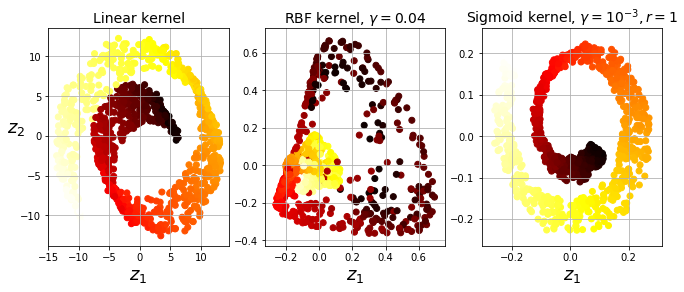

In [73]:
y = t > 6.9

plt.figure(figsize = (11, 4))

for subplot, pca, title in ((131, lin_pca, 'Linear kernel'), (132, rbf_pca, 'RBF kernel, $\gamma=0.04$'), (133, sig_pca, 'Sigmoid kernel, $\gamma=10^{-3}, r=1$')):
    X_reduced = pca.fit_transform(X)
    
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize = 14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = t, cmap = plt.cm.hot)
    plt.xlabel('$z_1$', fontsize = 18)
    
    if subplot == 131:
        plt.ylabel('$z_2$', fontsize = 18, rotation = 0)
    plt.grid(True)

plt.show()

## Selecting a Kernel and Tuning Hyperparameters

kPCA 是一種無監督的學習算法，沒有明顯的性能指標來選擇最佳的核函數和超參數值。所以可以使用網格搜尋，來找到最佳的核和超參數。

以下創建了一個兩步驟 pipeline（two-step pipeline），

* 首先使用 kPCA 將維度降低到兩個維度，

* 然後應用 Logistic 迴歸進行分類。 

* 最後，使用 **Grid SearchCV** 為 kPCA 找到最佳的核和 gamma 值，以便在 pipeline 最後獲得最佳分類準確度。

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [75]:
clf = Pipeline([
        ('kpca', KernelPCA(n_components = 2)),
        ('log_reg', LogisticRegression())
    ])

In [76]:
param_grid = [{
        'kpca__gamma':np.linspace(0.03, 0.05, 10),
        'kpca__kernel': ['rbf', 'sigmoid']
    }]

In [77]:
grid_search = GridSearchCV(clf, param_grid, cv = 3)

In [78]:
grid_search.fit(X, y)

/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/linear_model/lo

/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/linear_model/lo

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=None,
     random_state=None, remove_zero_eig=False, tol=0)), ('log_reg', LogisticRe...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kpca__gamma': array([0.03   , 0.03222, 0.03444, 0.03667, 0.03889, 0.04111, 0.04333,
       0.04556, 0.04778, 0.05   ]), 'kpca__kernel': ['rbf', 'sigmoid']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

可以透過 best_params_ 獲得最佳的核和超參數。

In [79]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


還有一種完全不受監督方法，是選擇重建誤差最低的核和超參數。然而，這個重建不像線性 PCA 重建容易。

下圖顯示了原始瑞士卷（Swiss roll）3D 數據集（左上），以及使用 RBF 核應用的 kPCA 所得到的2維數據集（右上）。因為核技巧，這在數學上等同於：透過*特徵映射函數 $\phi$*，將訓練集映射到無限維特徵空間（右下），然後使用線性 PCA 將變換後的訓練集投影到 2D 平面。

如果對一個已經降維的實例進行線性 PCA 逆轉換，重建的點將存在於特徵空間，而不是在原始空間中（例如，圖中的 $x$ 表示的那個點）。這裡特徵空間是無限維的，所以無法計算出重建點，因此也無法計算出真實的重建誤差。幸好，可已在原始空間中找到一個點，使其映射接近於重建點。這被稱為**重建原像（reconstruction pre-image）**。有了此 pre-image，可以測量與原始實例的平方距離。最後，就可以選擇使這個重建原像誤差最小化的核和超參數。

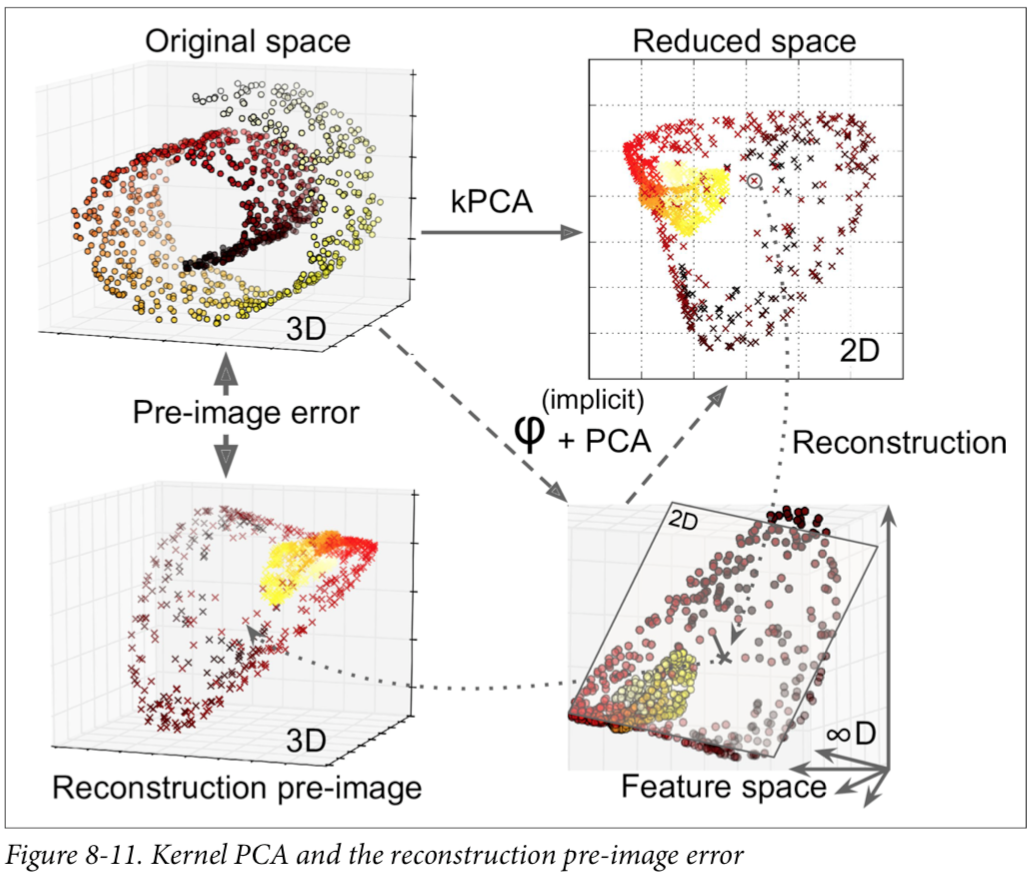

可以透過訓練一個監督迴歸模型，以投影後的實例作為訓練集，並以原始實例作為目標。

如果設置 fit_inverse_transform = True，Scikit-Learn 將會自動執行此操作。

*Scikit-Learn 使用的算法是基於一種核嶺迴歸算法，在論文 “Learning to Find Pre-images” 所提出的*

In [80]:
rbf_pca = KernelPCA(n_components =2, kernel = 'rbf', gamma = 0.0433, fit_inverse_transform = True)

In [81]:
X_reduced = rbf_pca.fit_transform(X)

In [82]:
X_preimage = rbf_pca.inverse_transform(X_reduced)

預測情况下，fit_inverse_transform = False，而 KernelPCA 沒有 inverse_transform()。 只有在設置 fit_inverse_transform = True 時才會創建該方法。

然後就可以計算 reconstruction pre-image 誤差。

In [83]:
from sklearn.metrics import mean_squared_error

In [84]:
mean_squared_error(X, X_preimage)

32.7863087957661

可以使用帶有交叉驗證的網格搜尋，來找出使這個原像重建誤差最小的的核和超參數了。

# LLE

**局部線性嵌入（Locally Linear Embedding）（LLE）** 是另一種非常強大的**非線性降維（NLDR）技術**。**它是一種流形學習技術（Manifold Learning technique）**，不像支籤的算法依賴於投影。簡單來說，LLE 的工作原理是：

* 首先測量每個訓練實例如何與其最近鄰居（c.n.）線性相關，

* 然後為訓練集尋找一個能最大程度保留這些局部關係的低維表示。

這使得它特别擅長展開彎曲的流形，特别是沒有太多噪音的情况下。

以下使用 Scikit-Learn 的 **LocallyLinearEmbedding** 來展開 Swiss roll。得到的 2D 數據集如下圖所示。如圖，瑞士卷完全展開，實例之間的距離局部保存的很好。但是，整體來看，距離不存得不夠好，不能保持在更大的範圍内：**展開的瑞士卷的左側部分被擠壓，而右側部分被拉長**。儘管如此，LLE 在流形建模方面做得相當不錯。

In [85]:
X, t = make_swiss_roll(n_samples = 1000, noise = 0.2, random_state = 41)

In [86]:
from sklearn.manifold import LocallyLinearEmbedding

In [87]:
lle = LocallyLinearEmbedding(n_components = 2, n_neighbors = 10)

In [88]:
X_reduced = lle.fit_transform(X)

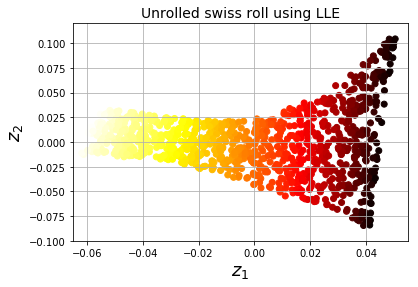

In [89]:
plt.title('Unrolled swiss roll using LLE', fontsize = 14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = t, cmap = plt.cm.hot)
plt.xlabel('$z_1$', fontsize = 18)
plt.ylabel('$z_2$', fontsize = 18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()

以下是 LLE 的工作原理：

首先，對每個訓練實例 $x^{(i)}$，算法會識別出離它最近的 $k$ 個鄰居（在前面的代碼中 $k=10$），然後嘗試將 $x^{(i)}$ 重建為這些鄰居的線性函數。

更具體來說，就是要找到權重 $w_{i,j}$，使得實例 $x^{(i)}$ 和 $\sum_{j=1}^m  w_{i,j} x^{(j)}$之間的距離平方最小，如果實例 $x^{(j)}$ 不是實例 $x^{(i)}$ 的$k$ 個最近鄰居之一，則假設 $w=0$。

因此，LLE 的**第一步**是以下公式所示的約束優化問題，其中 $W$ 是包含所有權重 $w_{i,j}$ 的權重矩陣， 第二個約束則是簡單地對每個訓練實例 $x^{(i)}$ 的權重進行歸一。

**LLE step 1: linearly modeling local relationships：**

$$ \hat W = \underset{w}{argmin} \sum_{i=1}^m || x^{(i)} - \sum_{j=1}^n w_{i,j}x^{(j)} ||^2 $$

$$ subject\; to \begin{cases} w_{i,j} = 0 & if\; x^{(j)} \;is\;not\;one\;of\;the\;k\;c.n.\;of\;x^{(i)} \cr \sum_{j=1}^m w_{i,j}=1&(i=1,2,...,m) \end{cases} $$

之後，權重矩阵$\hat W$（包含權重 $w_(i,j)$）對訓練實例之間的局部線性關係進行編碼。**第二步**是將訓練實例映射到 $d$ 維空間（其中 $d < n$），同時盡可能保留這些局部關係。如果 $z^{(i)}$ 是實例 $x^{(i)}$ 在這個 $d$ 維空間的映像，則希望 $z^{(i)}$ 和 $\sum_{j=1}^m  \hat w_{i,j} Z^{(j)}$ 之間的平方距離盡可能小。

這產生了以下公式中描述的一個無約束優化問題。它看起來與第一步非常相似，但不是保持固定距離尋找最佳權重，而是反過來：**保持最佳權重，並在低維空間中找到每個實例映像的最佳位置**。 注意 $Z$ 是包含所有 $z^{(i)}$ 的矩陣。

**LLE step 2: reducing dimensionality while preserving relationships：**

$$ \hat Z = \underset{z}{argmin} \sum_{i=1}^m ||z^{(i)} - \sum_{j=1}^m \hat w_{i,j} z^{(j)}|| ^2$$

Scikit-Learn 的 LLE 實現，計算複雜度：
* 尋找 $k$ 個最近鄰維 $O(m log(m)nlog(k))$
* 優化權重為 $O(mnk^3)$ 
* 構建低維表示為 $O(dm^2)$ 

不幸的是，最後一個表達式中的 $m^2$ 說明這個算法很難擴展應用到非常大的數據集。

# Other Dimensionality Reduction Techniques

還有許多其他降維技術，部分可在 Scikit-Learn 中找到。以下是一些最流行的：

• **多維縮放 - Multidimensional Scaling（MDS）**，保持實例之間的距離，降低了維度（見以下的圖）。

• **等度量映射 - （Isomap）**，將每個實例與其最近的鄰居連接起來，創建連接圖形，然後保留實例之間的這個測地距離（圖中兩個節點之間的側地距離是兩個節點之間最短路徑上的節點數），降低維度。

• **t-分佈隨機近鄰嵌入- t-Distributed Stochastic Neighbor Embedding (t-SNE)** ，在降低維數時，試圖讓相似的實例彼此靠近，不相似的實例彼此遠離。它主要用於可視化，尤其是將高維空間中的實例集群可視化（例如，對 MNIST 圖像進行二維可視化）。

• **線性判别- Linear Discriminant Analysis（LDA）**，實際上是一種分類算法，但在訓練期間，會學習類別之間最有區別的軸，而這個軸正好可以用來定義投影數據的超平面。**好處是投影上的類別之間會盡可能地分開，所以在運行其他分類算法（如 SVM 分類器）之前，LDA 是一種降低維度的好方法**。

In [90]:
from sklearn.manifold import MDS

In [91]:
mds = MDS(n_components = 2, random_state = 42)

In [92]:
X_reduced_mds = mds.fit_transform(X)

In [93]:
from sklearn.manifold import Isomap

In [94]:
isomap = Isomap(n_components = 2)

In [95]:
X_reduced_isomap = isomap.fit_transform(X)

In [96]:
from sklearn.manifold import TSNE

In [97]:
tsne = TSNE(n_components = 2, random_state = 42)

In [98]:
X_reduced_tsne = tsne.fit_transform(X)

In [99]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [100]:
lda = LinearDiscriminantAnalysis(n_components = 2)

In [101]:
X_mnist = mnist['data']
y_mnist = mnist['target']

In [102]:
lda.fit(X_mnist, y_mnist)

/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [103]:
X_reduced_lda = lda.transform(X_mnist)

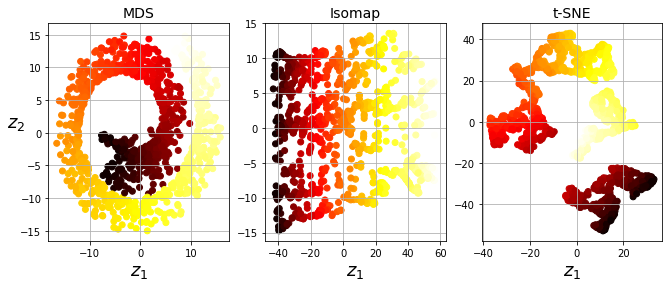

In [104]:
titles = ['MDS', 'Isomap', 't-SNE']

plt.figure(figsize = (11, 4)) 

for subplot, title, X_reduced in zip((131, 132, 133), titles, (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize = 14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = t, cmap = plt.cm.hot)
    plt.xlabel('$z_1$', fontsize = 18)
    if subplot == 131:
        plt.ylabel('$z_2$', fontsize = 18, rotation = 0)
    plt.grid(True)

plt.show()

## 補充

以下為作者 githut 中的內容。

用於繪製 3D 箭頭的實用程序（copied from http://stackoverflow.com/questions/11140163）

In [105]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

In [106]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

將平面表示為 x 和 y 的函數。

In [107]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

In [108]:
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles) / 2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [109]:
from sklearn.decomposition import PCA

In [110]:
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [111]:
X3D_inv = pca.inverse_transform(X2D)

In [112]:
axes = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]

x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)

In [113]:
C = pca.components_

In [114]:
R = C.T.dot(C)
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2])

在該平面上繪製三維數據集，平面和投影。

In [115]:
from mpl_toolkits.mplot3d import Axes3D

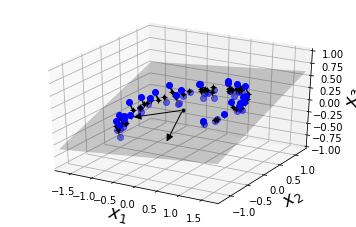

In [116]:
fig = plt.figure(figsize = (6, 3.8))
ax = fig.add_subplot(111, projection = '3d')

X3D_above = X[X[:, 2] > X3D_inv[:, 2]]
X3D_below = X[X[:, 2] <= X3D_inv[:, 2]]

ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], 'bo', alpha = 0.5)

ax.plot_surface(x1, x2, z, alpha = 0.2, color = 'k')
np.linalg.norm(C, axis = 0)
ax.add_artist(Arrow3D([0, C[0, 0]], [0, C[0, 1]], [0, C[0, 2]], mutation_scale = 15, lw = 1, arrowstyle = '-|>', color = 'k'))
ax.add_artist(Arrow3D([0, C[1, 0]], [0, C[1, 1]], [0, C[1, 2]], mutation_scale = 15, lw = 1, arrowstyle = '-|>', color = 'k'))
ax.plot([0], [0], [0], 'k.')

for i in range(m):
    if X[i, 2] > X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], 'k-')
    else:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], 'k-', color = '#505050')
    
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], 'k+')
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], 'k.')
ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], 'bo')
ax.set_xlabel('$x_1$', fontsize = 18)
ax.set_ylabel('$x_2$', fontsize = 18)
ax.set_zlabel('$x_3$', fontsize = 18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

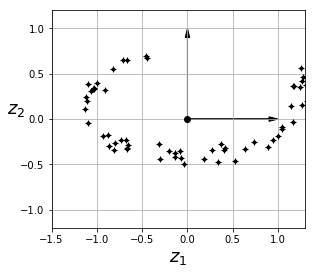

In [117]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect = 'equal')

ax.plot(X2D[:, 0], X2D[:, 1], 'k+')
ax.plot(X2D[:, 0], X2D[:, 1], 'k.')
ax.plot([0], [0], 'ko')
ax.arrow(0, 0, 0, 1, head_width = 0.05, length_includes_head = True, head_length = 0.1, fc = 'k', ec = 'k')
ax.arrow(0, 0, 1, 0, head_width = 0.05, length_includes_head = True, head_length = 0.1, fc = 'k', ec = 'k')
ax.set_xlabel('$z_1$', fontsize = 18)
ax.set_ylabel('$z_2$', fontsize = 18, rotation = 0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)

Swiss roll:

In [118]:
from sklearn.datasets import make_swiss_roll

In [119]:
X, t = make_swiss_roll(n_samples = 1000, noise = 0.2, random_state = 42)

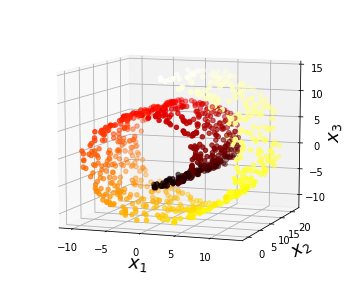

In [120]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize = (6, 5))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = t, cmap = plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel('$x_1$', fontsize = 18)
ax.set_ylabel('$x_2$', fontsize = 18)
ax.set_zlabel('$x_3$', fontsize = 18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

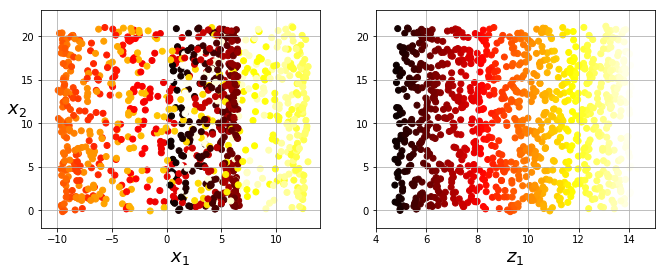

In [121]:
plt.figure(figsize = (11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c = t, cmap = plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$x_2$', fontsize=18, rotation = 0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c = t, cmap = plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel('$z_1$', fontsize = 18)
plt.grid(True)

plt.show()

In [122]:
from matplotlib import gridspec

In [123]:
axes = [-11.5, 14, -2, 23, -12, 15]

In [124]:
x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

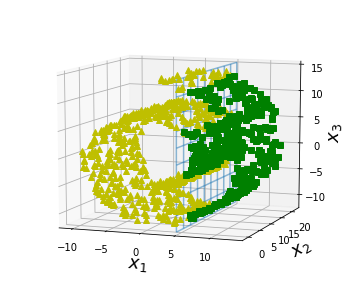

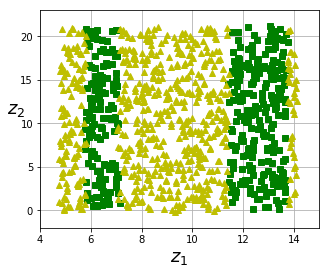

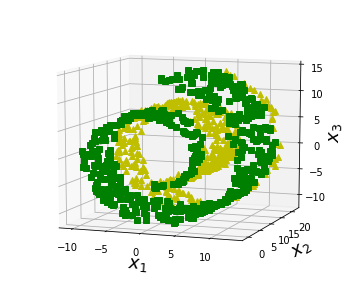

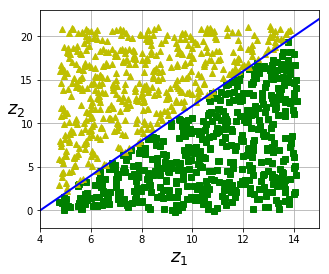

In [125]:
fig = plt.figure(figsize = (6, 5))
ax = plt.subplot(111, projection = '3d')

positive_class = X[:, 0] > 5
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], 'y^')
ax.plot_wireframe(5, x2, x3, alpha = 0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], 'gs')
ax.set_xlabel('$x_1$', fontsize = 18)
ax.set_ylabel('$x_2$', fontsize = 18)
ax.set_zlabel('$x_3$', fontsize = 18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

fig = plt.figure(figsize = (5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.show()

 
fig = plt.figure(figsize = (6, 5))
ax = plt.subplot(111, projection = '3d')

positive_class = 2 * (t[:] - 4) > X[:, 1]
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()


fig = plt.figure(figsize = (5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.plot([4, 15], [0, 22], "b-", linewidth=2)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)


plt.show()

PCA

In [126]:
angle = np.pi / 5
stretch = 5
m = 200

In [127]:
np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0], [0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

In [128]:
u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi / 6), np.sin(angle - 2 * np.pi / 6)])
u3 = np.array([np.cos(angle - np.pi / 2), np.sin(angle - np.pi / 2)])

In [129]:
X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

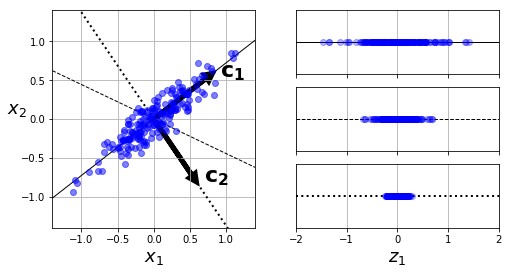

In [130]:
plt.figure(figsize = (8, 4))
plt.subplot2grid((3, 2), (0, 0), rowspan = 3)
plt.plot([-1.4, 1.4], [-1.4 * u1[1] / u1[0], 1.4 * u1[1] / u1[0]], 'k-', linewidth = 1)
plt.plot([-1.4, 1.4], [-1.4 * u2[1] / u2[0], 1.4 * u2[1] / u2[0]], 'k--', linewidth = 1)
plt.plot([-1.4, 1.4], [-1.4 * u3[1] / u3[0], 1.4 * u3[1] / u3[0]], 'k:', linewidth = 2)
plt.plot(X[:, 0], X[:, 1], 'bo', alpha = 0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width = 0.1, linewidth = 5, length_includes_head = True, head_length = 0.1, fc = 'k', ec = 'k')
plt.arrow(0, 0, u3[0], u3[1], head_width = 0.1, linewidth = 5, length_includes_head = True, head_length = 0.1, fc = 'k', ec = 'k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r'$\mathbf{c_1}$', fontsize = 22)
plt.text(u3[0] + 0.1, u3[1], r'$\mathbf{c_2}$', fontsize = 22)
plt.xlabel('$x_1$', fontsize = 18)
plt.ylabel('$x_2$', fontsize = 18, rotation = 0)
plt.grid(True)

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], 'k-', linewidth = 1)
plt.plot(X_proj1[:, 0], np.zeros(m), 'bo', alpha = 0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], 'k--', linewidth = 1)
plt.plot(X_proj2[:, 0], np.zeros(m), 'bo', alpha = 0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], 'k:', linewidth = 2)
plt.plot(X_proj3[:, 0], np.zeros(m), 'bo', alpha = 0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel('$z_1$', fontsize = 18)
plt.grid(True)

plt.show()

# 心得

降維基本上對於高維資料要將其視覺化有很大的助益，特別是目前在實際上的資料應該都屬於高維資料，透過降維後可以看出資料的群聚效果，算是可以對資料有個基本的概觀，之後要對資料進行其他分析時，可以有個方向。先前知道的降維演算法就是 PCA，而最新的就是 t-SNE，只是作者在這邊對於 t-SNE 並沒有深入的介紹，只能另外找其他的學習資源。透過作者介紹 PCA 的部分，可以更加深入了解其內涵，另外說明的 LLE 的演算法，算是學習到一個新的內容。